# 911 Calls Capstone

<br>

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

**Import Numpy and Pandas**

In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing

**Import visualization Libaries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Read in the csv file as a Dataframe called data**

In [4]:
data = pd.read_csv('911.csv')

**Check the info() of the data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
data.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

**Check the head of data**

In [7]:
data.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [11]:
data['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [27]:
data.groupby('zip')['zip'].count().sort_values(ascending = False).head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [29]:
data['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [30]:
data.groupby('twp')['twp'].count().sort_values(ascending = False).head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [39]:
len(data['title'].unique())

110

In [35]:
data['title'].nunique()

110

## Creating a new features

**Reason for the emergency**

In the 'title' column we have the reasons before the title code. These are EMS, Fire and Traffic. Let's put them in a new column.

In [40]:
data['reason'] = data['title'].apply(lambda x: x.split(':')[0])

In [41]:
data.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS  
2                    HAWS AVE  1   Fire  
3          AIRY ST & SWEDE ST  1    EMS  
4    CHERRYWOOD CT & DEAD END  1    EMS

**What is the most common Reason for a 911 call based off of this new column?**

In [42]:
data['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

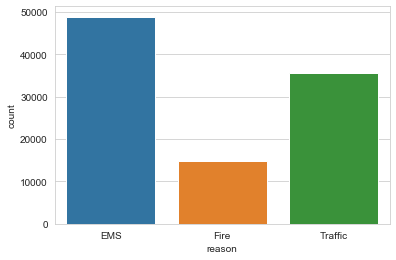

In [49]:
sns.countplot(data['reason'])

**What is the data type of the objects in the timeStamp column?**

In [51]:
type(data['timeStamp'].iloc[0])

str

**Let's convert to datetime.**

In [52]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [53]:
data.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
reason               object
dtype: object

In [54]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Now let's make a column for Hour, Month and Day of Week**

In [55]:
data['hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['month'] = data['timeStamp'].apply(lambda time: time.month)
data['day of week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [56]:
data.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  hour  month  day of week  
0      REINDEER CT & DEAD END  1    EMS    17     12            3  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12            3  
2                    HAWS AVE  1   Fire    17     12            3  
3          AIRY ST & SWEDE ST  1    EMS    17     12            3  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12            3

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [57]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['day of week'] = data['day of week'].map(dmap)

In [58]:
data.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  hour  month day of week  
0      REINDEER CT & DEAD END  1    EMS    17     12         Thu  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12         Thu  
2                    HAWS AVE  1   Fire    17     12         Thu  
3          AIRY ST & SWEDE ST  1    EMS    17     12         Thu  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12         Thu

**Create a countplot of the Day of Week column with the hue based off of the Reason column.**

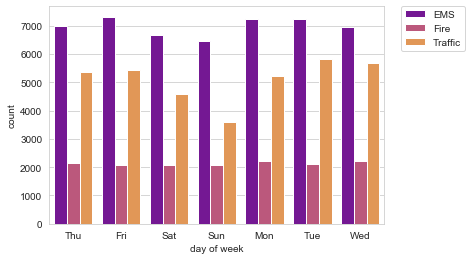

In [63]:
sns.countplot(x = 'day of week',data = data, hue = 'reason', palette = 'plasma')

# To relocate the legend
plt.legend(bbox_to_anchor = (1.05, 1), loc =2, borderaxespad = 0)

**Create a countplot of the month column with the hue based off of the Reason column.**

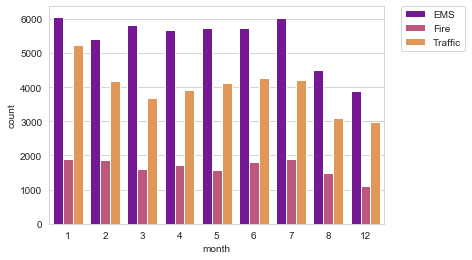

In [65]:
sns.countplot(x = 'month',data = data, hue = 'reason', palette = 'plasma')

# To relocate the legend
plt.legend(bbox_to_anchor = (1.05, 1), loc =2, borderaxespad = 0)

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [67]:
by_month = data.groupby('month').count()
by_month.head(12)

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   
6      11786  11786  11786  10212  11786      11786  11777  11732  11786   
7      12137  12137  12137  10633  12137      12137  12133  12088  12137   
8       9078   9078   9078   7832   9078       9078   9073   9025   9078   
12      7969   7969   7969   6907   7969       7969   7963   7916   7969   

       reason   hour  day of week  
month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423  
6       11786  11786        11786  
7       12137  12137        12137  
8        9078   9078         9078  
12       7969   7969         7969

Now we create a simple plot off of the data indicating the count of calls per month.

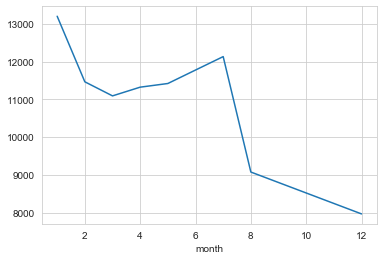

In [68]:
by_month['twp'].plot()

Now we can see if we can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.

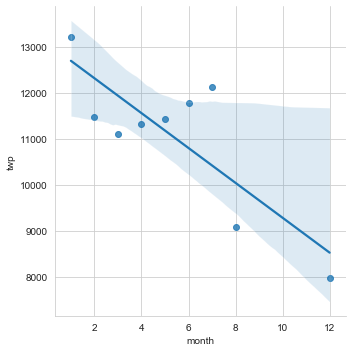

In [69]:
sns.lmplot(x = 'month', y = 'twp', data = by_month.reset_index())

In [70]:
# Create a new column called date and that contains the date from the timeStamp column.
data['date'] = data['timeStamp'].apply(lambda x: x.date())

In [71]:
data.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e reason  hour  month day of week        date  
0      REINDEER CT & DEAD END  1    EMS    17     12         Thu  2015-12-10  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12         Thu  2015-12-10  
2                    HAWS AVE  1   Fire    17     12         Thu  2015-12-10  
3          AIRY ST & SWEDE ST  1    EMS    17     12         Thu  2015-12-10  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12         Thu  2015-12-10

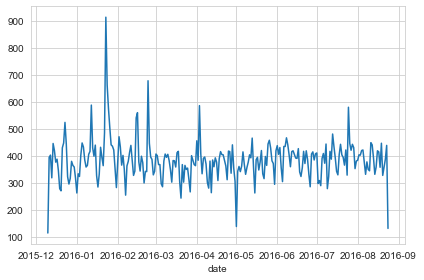

In [72]:
# Now groupy this date column with the count() aggregate and create a plot counts of 911 calls
data.groupby('date').count()['twp'].plot()
plt.tight_layout()

**Recreate this plot but create 3 separate plots with each plot representing a reson of the 911 call**

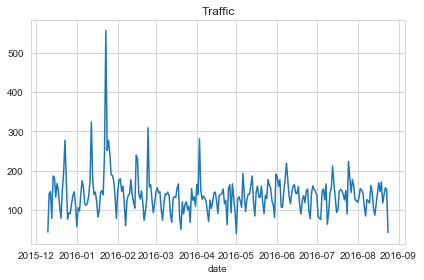

In [75]:
data[data['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

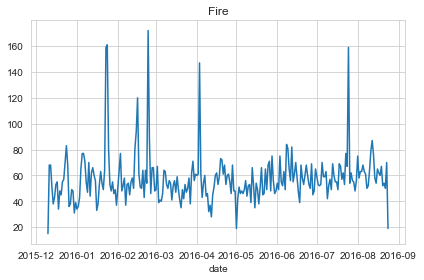

In [76]:
data[data['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

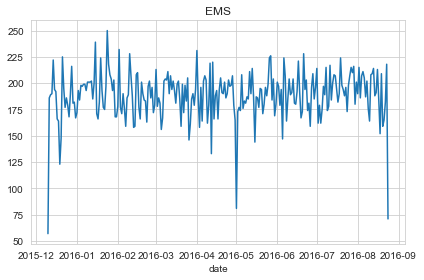

In [77]:
data[data['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [78]:
day_hour = data.groupby(by = ['day of week', 'hour']).count()['reason'].unstack()

In [79]:
day_hour.head()

hour          0    1    2    3    4    5    6    7    8    9   ...   14   15  \
day of week                                                    ...             
Fri          275  235  191  175  201  194  372  598  742  752  ...  932  980   
Mon          282  221  201  194  204  267  397  653  819  786  ...  869  913   
Sat          375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sun          383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thu          278  202  233  159  182  203  362  570  777  828  ...  876  969   

hour           16    17   18   19   20   21   22   23  
day of week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  
Sun           663   714  670  655  537  461  415  330  
Thu           935  1013  810  698  617  553  424  354  

[5 rows x 24 columns]

**Now we can create a heatmap.**

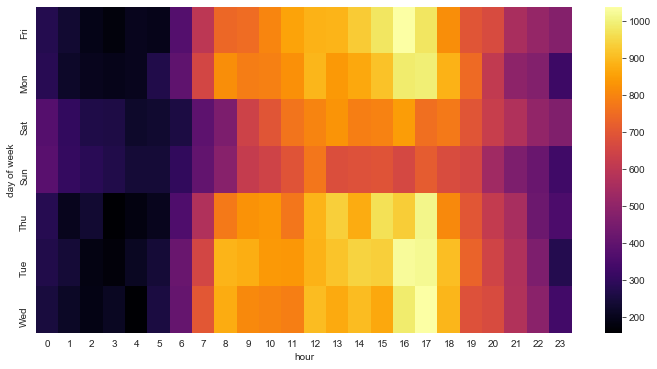

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour, cmap = 'inferno')

**Now we can create a clustermap too.**

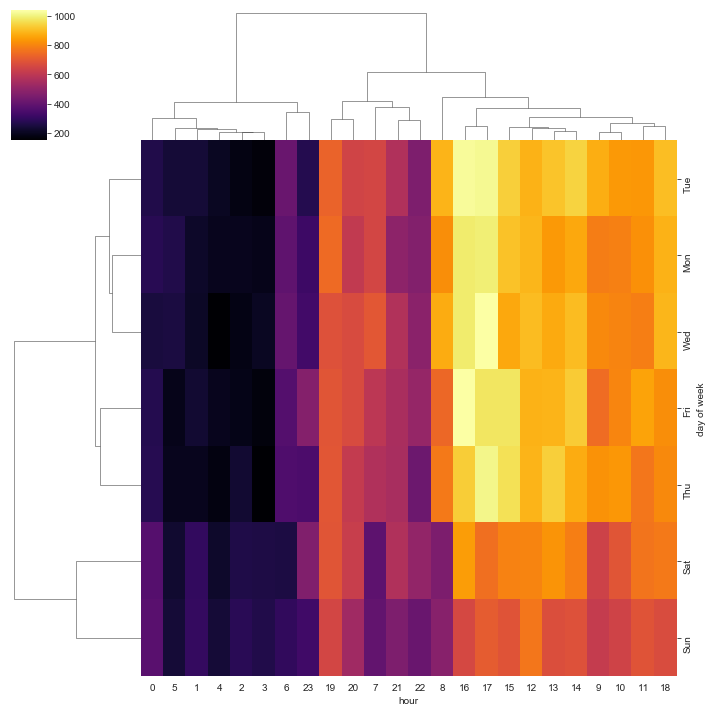

In [81]:
sns.clustermap(day_hour,cmap = 'inferno')

Now repeat these same plots and operations, for a dataframe that show the month as the column

In [82]:
day_month = data.groupby(by = ['day of week','month']).count()['reason'].unstack()
day_month.head()

month          1     2     3     4     5     6     7     8     12
day of week                                                      
Fri          1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon          1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat          2291  1441  1266  1734  1444  1388  1695  1099   978
Sun          1960  1229  1102  1488  1424  1333  1672  1021   907
Thu          1584  1596  1900  1601  1590  2065  1646  1230  1266

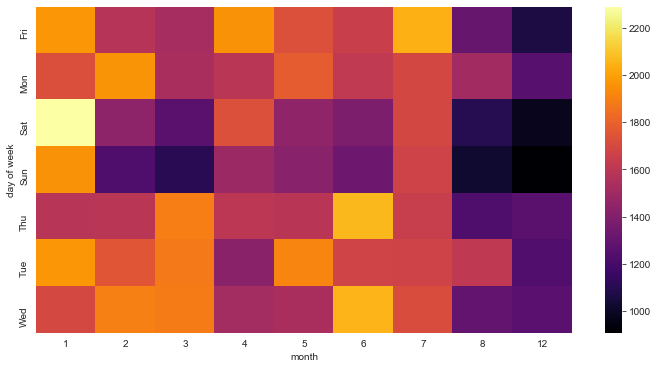

In [83]:
plt.figure(figsize=(12,6))
sns.heatmap(day_month, cmap = 'inferno')

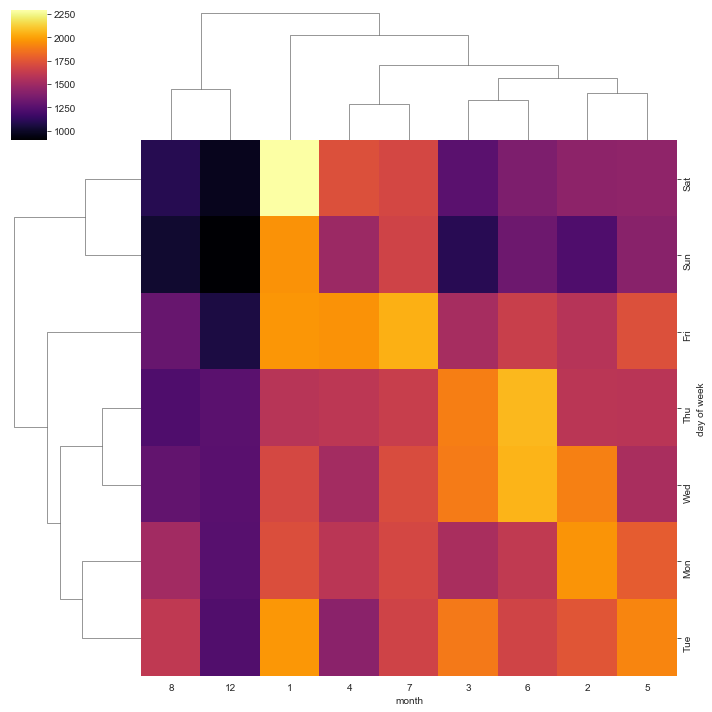

In [84]:
sns.clustermap(day_month, cmap = 'inferno')

## Build a Map